# House Market

Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [2]:
import pandas as pd

In [3]:
house_price = pd.read_csv("dataset/house_price.csv", index_col=0)
rooms = pd.read_csv("dataset/nombre_de_chambres.csv", names=['id', 'rooms'])
bathrooms = pd.read_csv("dataset/nombre_de_sdb.csv", names=['id', 'bathrooms'])
surface = pd.read_csv("dataset/superficie.csv", names=['id', 'surface'])

3. Give a column name to the three datasets that don't have a header in the source file

In [113]:
rooms.rename({'rooms': 'rooms'}, axis=1, inplace=True)
bathrooms.rename({'bathrooms': 'bathrooms'}, axis=1, inplace=True)
surface.rename({'surface': 'surface'}, axis=1, inplace=True)

In [114]:
house_price.head()

,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


In [115]:
surface.tail()

,id,surface
95,95,11417
96,96,12126
97,97,16390
98,98,23738
99,99,14613


In [116]:
bathrooms.head()

,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [117]:
rooms.head()

,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


In [87]:
house_price.head()

,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


4. Make an inner join of these four datasets into a single dataframe. 

In [123]:
dataset = surface.merge(bathrooms).merge(rooms).merge(house_price)

767747.87

5. What is the average surface area of the houses in our dataset?

In [125]:
dataset["surface"].mean()

20439.77

6. What is the median and average number of rooms?

In [126]:
print (f"The average number of room is {round(dataset['rooms'].mean(), 2)}, and the median number is {dataset['rooms'].median()}")

The average number of room is 2.42, and the median number is 2.0


7. What is the average cost of a house?

In [128]:
dataset["house_price"].mean()


767747.87

8. What is the average cost of a house, depending on the number of rooms it has?

In [129]:
dataset2 = dataset[["house_price", "rooms"]]
display(dataset2.groupby(['rooms']).mean())

,house_price
rooms,
1,980774.869565
2,642086.258065
3,645904.592593
4,888045.631579


10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

In [139]:
def size_category(surface_size):
    if surface_size > 25000:
        return "very large"
    elif surface_size >= 20000 and surface_size <= 25000:
        return "large"
    elif surface_size > 15000 and surface_size < 20000:
        return "medium"
    elif surface_size >= 10000 and surface_size <= 15000:
        return "small"
    else:
        return "very small"

In [140]:
dataset["house_size"] = dataset["surface"].apply(size_category)
dataset

,id,surface,bathrooms,rooms,house_price,house_size
0,0,28844,2,1,1421908.0,very large
1,1,27667,1,4,1305091.0,very large
2,2,14742,1,1,164373.0,small
3,3,28089,3,4,1441714.0,very large
4,4,11713,1,2,108290.0,small
...,...,...,...,...,...,...
95,95,11417,3,3,132599.0,small
96,96,12126,1,2,155828.0,small
97,97,16390,1,2,237061.0,medium
98,98,23738,1,2,976422.0,large


11. What is the average cost of a house depending on its size category?


In [142]:
dataset_2 = dataset.groupby(['house_size']).mean().sort_values(['house_price'],ascending=False)
dataset_2["house_price"].round(2)

house_size
very large    1552456.06
large          732538.52
medium         325694.79
small          156138.69
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

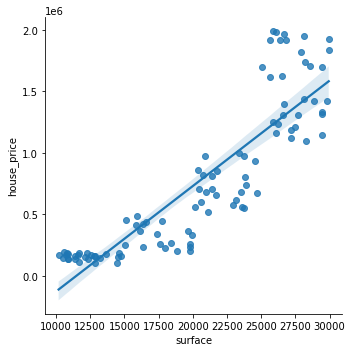

In [143]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "surface", y="house_price", data = dataset)